In [1]:
import sys
sys.path.append('../')
import daq
import file
import globalVAR as Gvar
import visa
import numpy as np
import time
from random import randint
import PyCapture2 as pc2

%load_ext autoreload
%autoreload 1

In [2]:
DAQ = daq.Daq(desc='Test Descritpion')
DAQ.connect_instr('HR4000', 'michaelito')

Spectrometer ID: HR4000,michaelito
Device michaelito successfully connected and process started.


In [5]:
DAQ.send_command(DAQ.command_queue['michaelito'], 'save_spectrum')

In [6]:
data = np.load('/mnt/md0/DAQ/TRACE/year_2018/month_12/day_06/1812060007/HR4000_1812060007_0001.npy').item()
print(data)
print(data['meta'])

{'save': True, 'meta': {'INSTR': 'HR4000', 'ID': 'HR4000,michaelito', 'Serial number': 'michaelito', 'Data set': 1812060007, 'Shot number': 1, 'Data type': 'TRACE'}, 't': array([ 194.4687    ,  194.7388045 ,  195.00890201, ..., 1124.93399997,
       1125.17234045, 1125.41067048]), 'y': array([2469., 2442., 2557., ..., 2461., 2449., 2468.])}
{'INSTR': 'HR4000', 'ID': 'HR4000,michaelito', 'Serial number': 'michaelito', 'Data set': 1812060007, 'Shot number': 1, 'Data type': 'TRACE'}


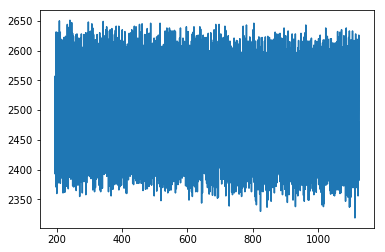

In [7]:
import matplotlib.pyplot as plt
plt.plot(data['t'], data['y'])
plt.show()

In [16]:
for key in DAQ.instr:
    for elem in DAQ.instr[key]:
        DAQ.disconnect_instr(key, elem)

In [4]:
DAQ.send_command(DAQ.command_queue['michaelito'], 'set_integration_time_microsec', (120,))